In [ ]:
import math
import numpy as np

In [ ]:
import cv2
import cv2 as cv

In [ ]:
from google.colab.patches import cv2_imshow

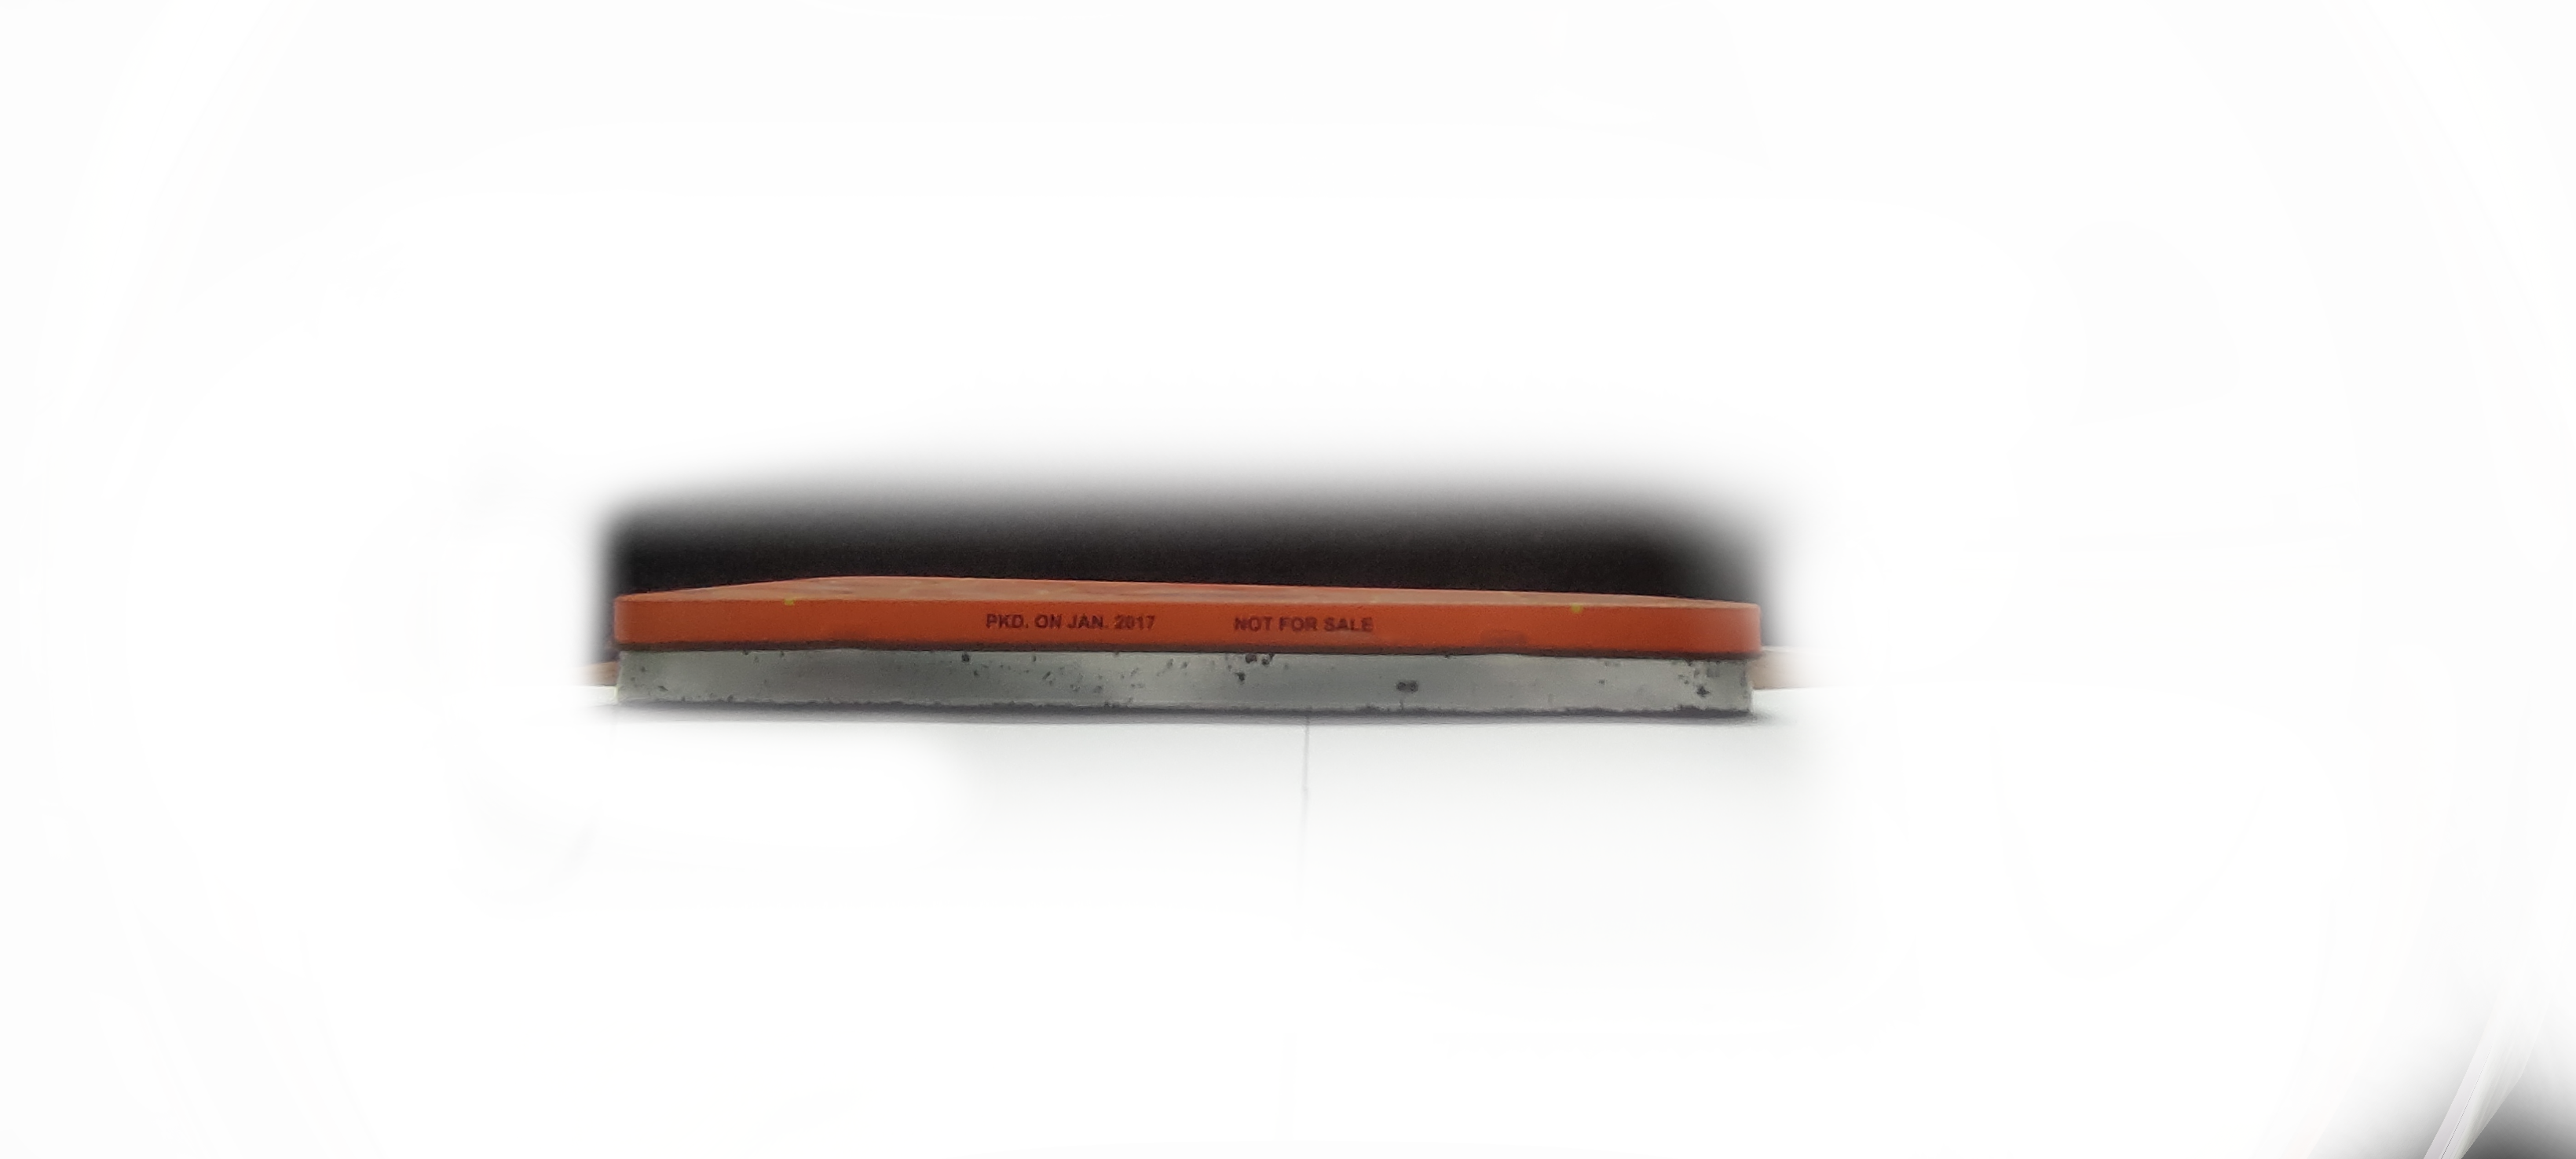

In [ ]:
image = cv2.imread('/content/calibresult (2) mod.png') #currently using a image with background removed, ideally we'll know the roi pixels from yolo
cv2_imshow(image) # this image has been corrected for any distortion

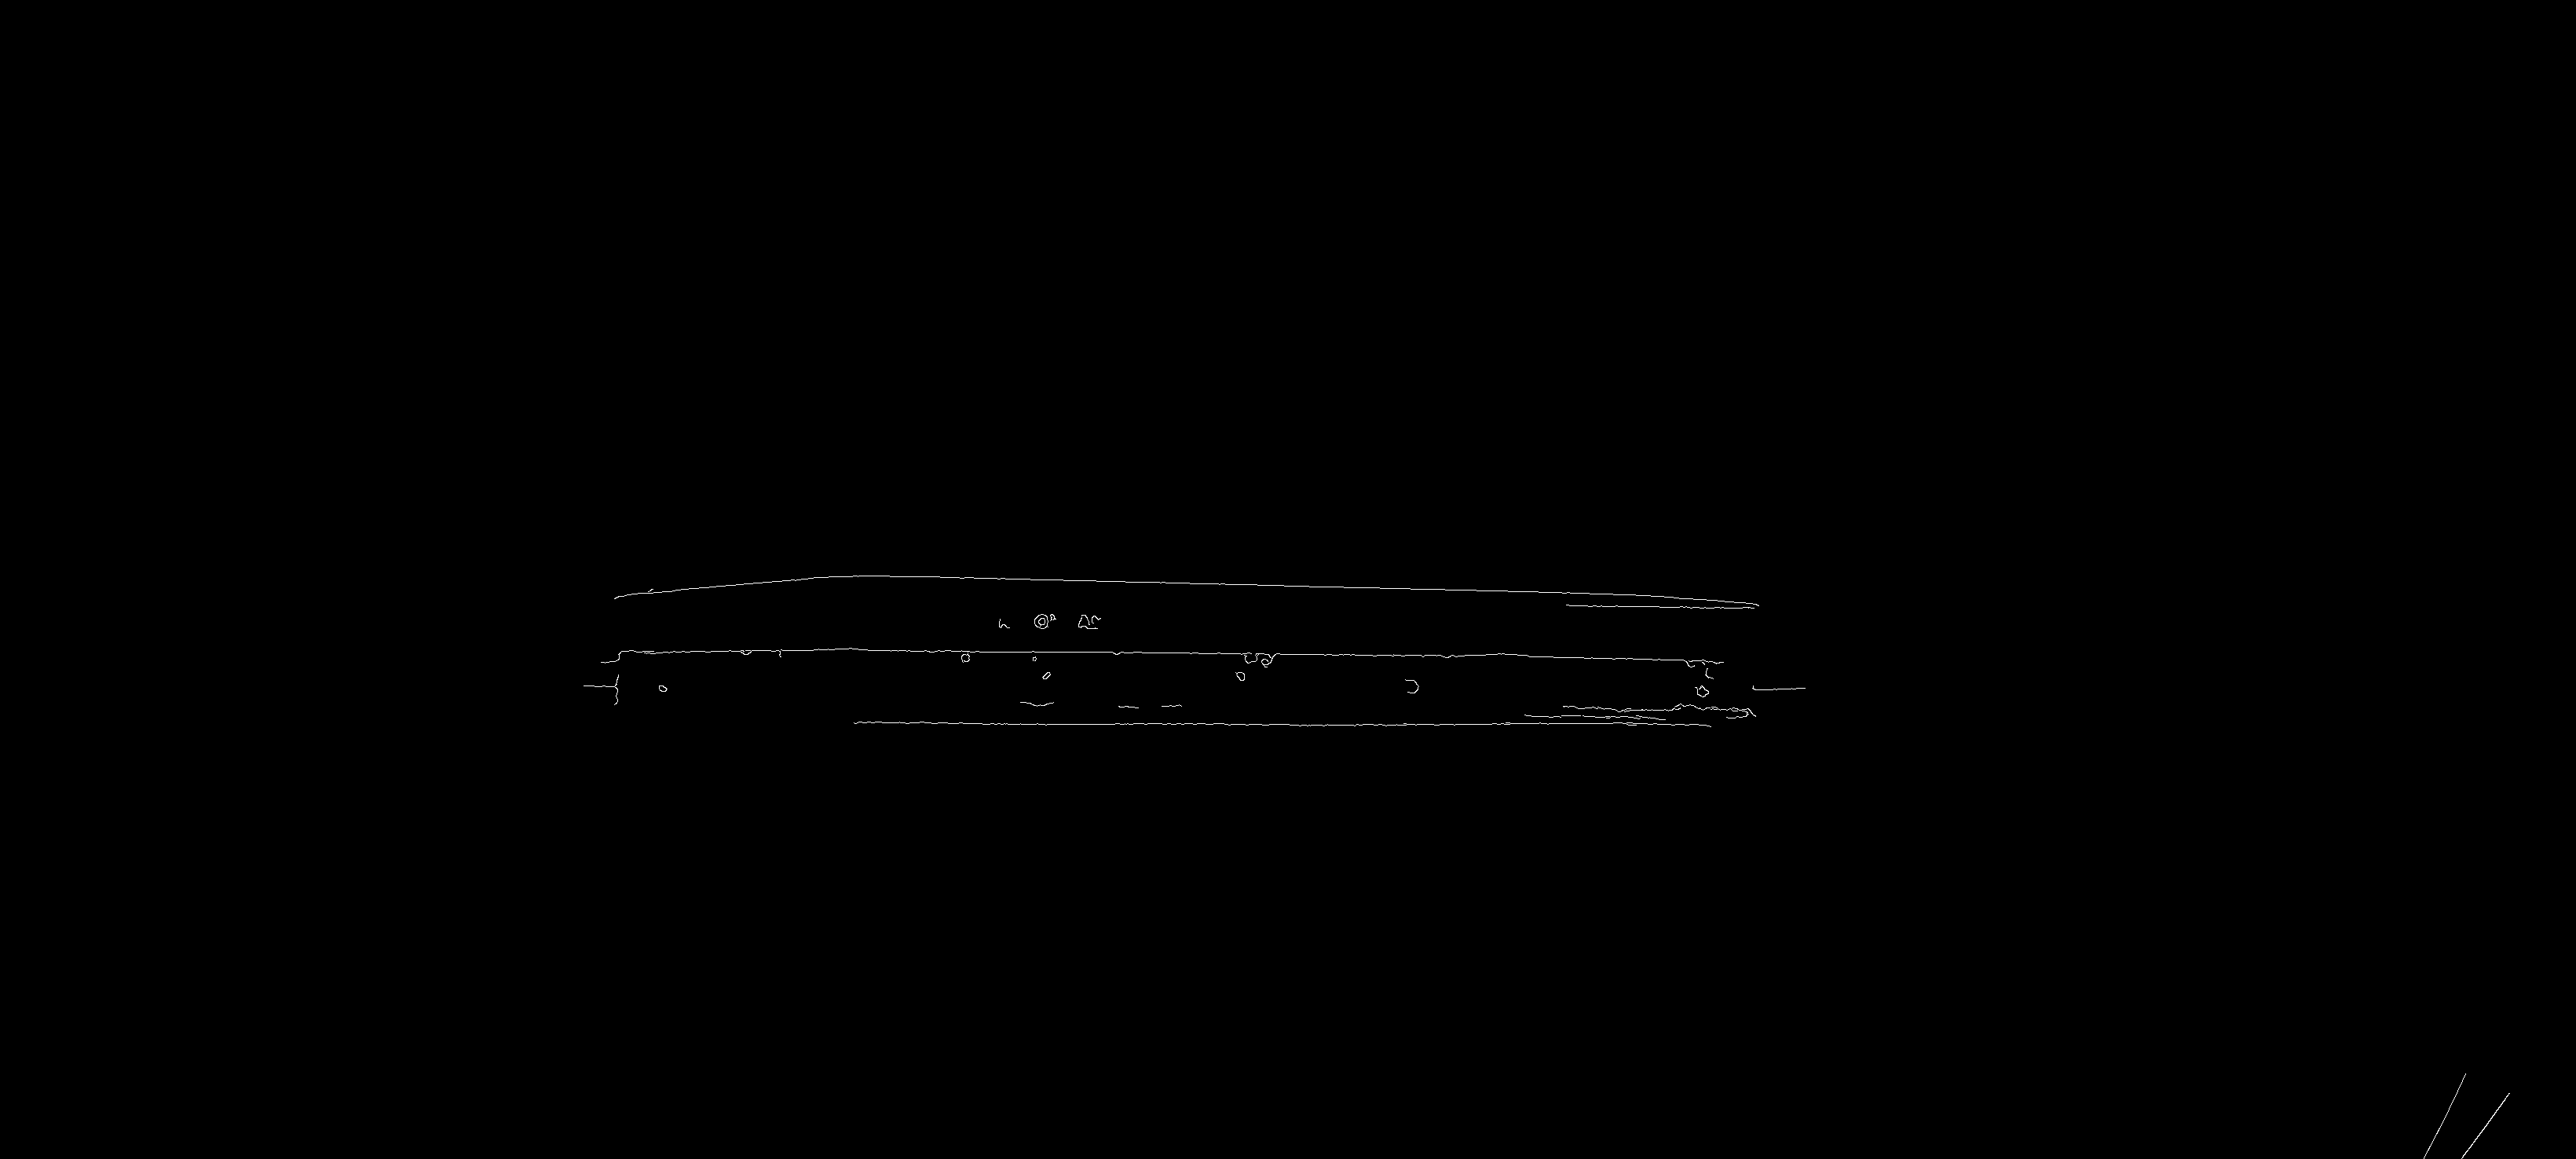

In [ ]:
image = cv2.imread('/content/calibresult (2) mod.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray=cv2.medianBlur(gray,5) #median blur to remove imperfections
edges = cv2.Canny(gray,50,150,apertureSize=3)#edge detection to get best corners

cv2_imshow(edges)

1640.0

### Harris Corner

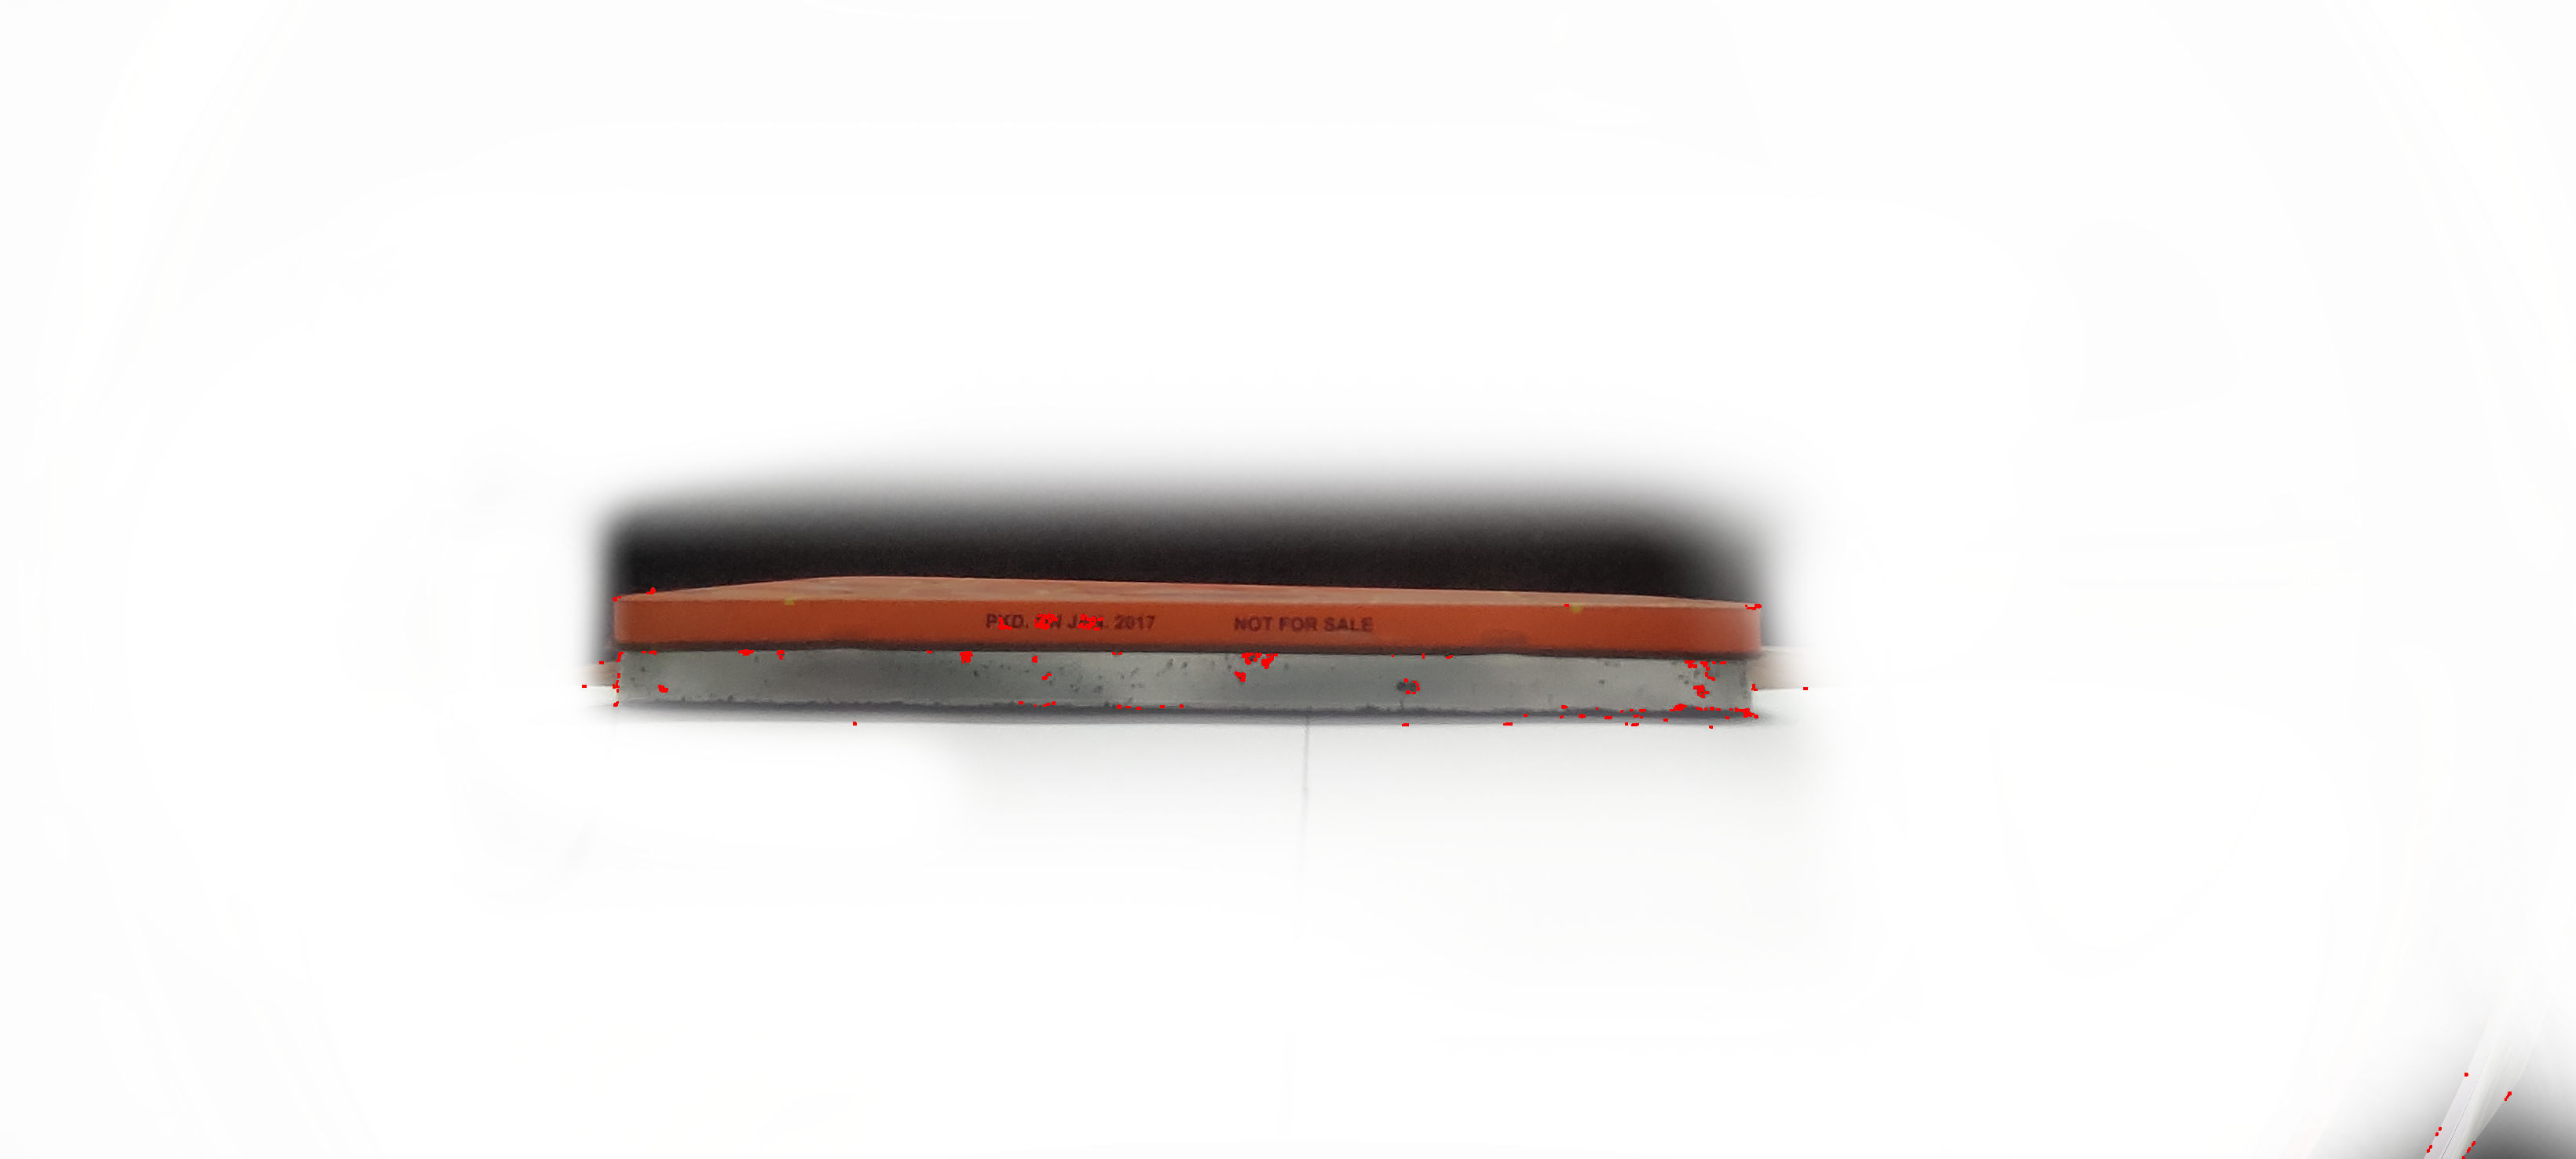

In [ ]:
gray = np.float32(edges)
dst = cv.cornerHarris(gray,2,9,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)

image[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(image) #checking the corners

In [ ]:
corners=[]
i_val=[]
j_val=[] #arrays to store location of oixels

In [ ]:
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image)

# Iterate through all the corners and draw them on the image 
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            i_val.append(i)
            j_val.append(j)



In [ ]:
i_val=np.array(i_val)
j_val=np.array(j_val)
print(np.argmax(i_val))

1806


In [ ]:
corner_cor=[]
corner_cor.append((i_val[np.argmax(i_val)],j_val[np.argmax(i_val)])) # finding coordinates of the most extreme corners detected

In [ ]:
corner_cor.append((i_val[np.argmin(i_val)],j_val[np.argmin(i_val)]))

In [ ]:
corner_cor #value of corners

[(3197, 1391), (743, 872)]

In [ ]:
#corner_cor=[(1148, 506), (381, 502)]

In [ ]:
FOV=118 #field of view of camera

In [ ]:
angle1=abs(corner_cor[0][0]-(len(image[0])/2))*(FOV/len(image[0]))
angle2=abs(corner_cor[1][0]-(len(image[0])/2))*(FOV/len(image[0]))

In [ ]:
angle2 #angle2 

26.32875

## Camera calibration and image undistortion

In [ ]:
import cv2
import cv2 as cv
import numpy as np
import os
import glob
 
 
# Define the dimensions of checkerboard
CHECKERBOARD = (6, 9)
 
 
# stop the iteration when specified
# accuracy, epsilon, is reached or
# specified number of iterations are completed.
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
 
# Vector for 3D points
threedpoints = []
 
# Vector for 2D points
twodpoints = []
 
 
#  3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0]
                      * CHECKERBOARD[1],
                      3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
 
 
# Extracting path of individual image stored
# in a given directory. Since no path is
# specified, it will take current directory
# jpg files alone
images = glob.glob('*.jpg')
 
for filename in images:
    image = cv2.imread(filename)
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
    # Find the chess board corners
    # If desired number of corners are
    # found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(
                    grayColor, CHECKERBOARD,
                    cv2.CALIB_CB_ADAPTIVE_THRESH
                    + cv2.CALIB_CB_FAST_CHECK +
                    cv2.CALIB_CB_NORMALIZE_IMAGE)
 
    # If desired number of corners can be detected then,
    # refine the pixel coordinates and display
    # them on the images of checker board
    if ret == True:
        threedpoints.append(objectp3d)
 
        # Refining pixel coordinates
        # for given 2d points.
        corners2 = cv2.cornerSubPix(
            grayColor, corners, (11, 11), (-1, -1), criteria)
 
        twodpoints.append(corners2)
 
        # Draw and display the corners
        image = cv2.drawChessboardCorners(image,
                                          CHECKERBOARD,
                                          corners2, ret)
 
    cv2_imshow( image)
    
 
cv2.destroyAllWindows()
 
h, w = image.shape[:2]
 
 
# Perform camera calibration by
# passing the value of above found out 3D points (threedpoints)
# and its corresponding pixel coordinates of the
# detected corners (twodpoints)
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
    threedpoints, twodpoints, grayColor.shape[::-1], None, None)
 
 
# Displaying required output
print(" Camera matrix:")
print(matrix)
 
print("\n Distortion coefficient:")
print(distortion)
 
print("\n Rotation Vectors:")
print(r_vecs)
 
print("\n Translation Vectors:")
print(t_vecs)


img = cv.imread('30.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(matrix, distortion, (w,h), 1, (w,h))
# undistort
dst = cv.undistort(img, matrix, distortion, None, newcameramtx)
# crop the image
#x, y, w, h = roi
#dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)

## Another approach to be tested

### **COntours**

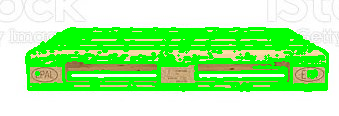

In [ ]:
image = cv2.imread('/content/55555.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray=cv2.medianBlur(gray,5)
edges = cv2.Canny(gray,50,150,apertureSize=3)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(img, contours, -1, (0,255,0), 2)

cv2_imshow(image)

In [ ]:
areas=[]
for i in contours:
  area = cv.contourArea(i)
  areas.append(area)



In [ ]:
areas

[9.0, 6.0, 1.5, 8.0, 6.0, 4948.0, 556.0, 4333.0, 544.0, 537.0, 20.0]

In [ ]:
indices=[]
for i in range(len(areas)):
  if areas[i]>400:
    indices.append(i)


In [ ]:
contours_c=[]
for i in indices:
  contours_c.append(contours[i])

In [ ]:
len(contours_c)

5

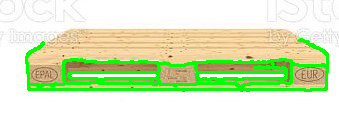

In [ ]:
image = cv2.imread('/content/55555.jpg')
image = cv2.drawContours(image, contours_c, -1, (0,255,0), 2)

cv2_imshow(image)

Contours


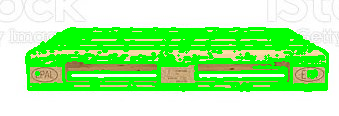

In [ ]:
image = cv2.imread('/content/55555.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray=cv2.medianBlur(gray,5)
edges = cv2.Canny(gray,50,150,apertureSize=3)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(img, contours, -1, (0,255,0), 2)

cv2_imshow(image)

In [ ]:
areas=[]
for i in contours:
  area = cv.contourArea(i)
  areas.append(area)



In [ ]:
areas

[9.0, 6.0, 1.5, 8.0, 6.0, 4948.0, 556.0, 4333.0, 544.0, 537.0, 20.0]

In [ ]:
indices=[]
for i in range(len(areas)):
  if areas[i]>400:
    indices.append(i)


In [ ]:
contours_c=[]
for i in indices:
  contours_c.append(contours[i])

In [ ]:
len(contours_c)

5

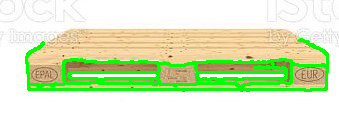

In [ ]:
image = cv2.imread('/content/55555.jpg')
image = cv2.drawContours(image, contours_c, -1, (0,255,0), 2)

cv2_imshow(image)